# Lab 3. Files and figures
#### Instructor: Eric Lindsey
---------

These assignments will help you get started with reading files and making plots in Python - good luck!

In [1]:
# Google Colab code to change to this directory - set your directory correctly:
from google.colab import drive
drive.mount('/content/drive')

import os
#
os.chdir('/content/drive/MyDrive/MES Env Data 2025/Week 4 - files and figures/files_figures_lab')

# check what files are in the current directory:
os.listdir()

Mounted at /content/drive


['sst.mon.ltm.1981-2010.nc',
 'sst.mon.mean.nc',
 'missing3.csv',
 'missing2.txt',
 'bad_data.csv',
 'missing1.csv',
 'Lab3-assignment-Files-and-figures.ipynb',
 'simple_file.txt',
 'matplotlib-help.ipynb',
 'cats_over_time.csv',
 'files-and-pandas-help.ipynb']

## we likely need to install some modules in this environment.
#### install netCDF4:
Note, this is not really a python command, it's a shell command that Colab recognizes and automatically runs in a shell for us.

In [2]:
pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.3 MB/s eta 0:00:00


Import our packages: if one is missing, install it as above using 'pip'

In [3]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc

### Assignment 1: Download and read in a csv file of recent earthquakes

Go to https://earthquake.usgs.gov/earthquakes/search/ and conduct a search of your choice, but make sure it contains at least 1 magnitude 7 or larger event.

Under 'output options' change the format to 'CSV', it should download directly to your computer.

Now, read this file into python using Pandas, and print out just the 'time', 'latitude', 'longitude', 'depth' and 'mag' columns, for only the earthquakes over magnitude 7.

Hint: if you have a pandas data frame with lots of columns and only want to print some, you can give a list of just the names you want to print, like so:

    print(mydata[['latitude','longitude','mag']])

In [17]:
mydata=pd.read_csv('query.csv')

print(mydata['time'][0])

2025-07-08T03:52:10.603Z


### Assignment 2: plotting earthquakes

Create a map view of the earthquakes from your USGS query above. The X and Y axes of the plot could be longitude and latitude, but you can choose how to represent depth, magnitude, time, etc. (choose at least 1 of these to represent). You could use color, marker size, 3D heights, etc. Don't go too crazy, but have fun! Take a look at some demos here, maybe copy one you like and modify it to your use: https://matplotlib.org/stable/gallery/index.html

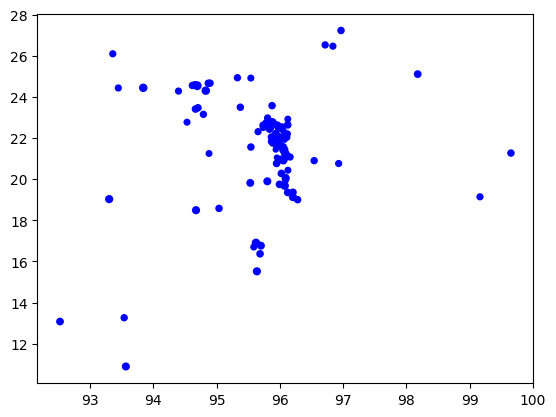

In [10]:
plt.scatter(mydata['longitude'],mydata['latitude'],mydata['mag']**2,'b')

In [14]:
print(min(mydata['mag']))

3.4


### Assignment 3: Working with datetime

Plot the earthquake magnitudes from your query over time, making sure to take care of the 'datetime' formatting of both the data and the x-axis of the plot.

Hint: import the module 'datetime' and then use the function datetime.datetime.strptime() to convert the string-formatted dates into datetime objects.

This one may be tricky - use chatgpt or the datetime documentation to help!

### Assignment 4: Make a beautiful SST plot
The file called 'sst.mon.mean.nc' (160 MB) contains the monthly timeseries of sea surface temperatures from 1891 to present  from https://downloads.psl.noaa.gov/Datasets/COBE/.

Create a beautiful plot of one particular month's SST map, and use plt.savefig() to save it as a PDF to turn in alongside the lab. I will share my favorite next week - use creative colorschemes, plotting methods, or anything else unexpected!


In [19]:
sstdata = nc.Dataset('sst.mon.mean.nc')

print(sstdata)

<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: COBE Sea Surface Temperature Analysis
    history: created June 2011 at ESRL/PSD using the grib data from JRA.
    platform: Analyses
    original_source: http://near-goos1.jodc.go.jp/cgi-bin/1997/near_goos_catalog?projectname=NEAR-GOOS
    Conventions: CF-1.2
    institution: NOAA ESRL/PSD
    comment: recent values (w/i last year) may change as dataset is updated. It is a monitoring dataset.
    dataset_title: COBE Sea Surface Temperature
    References: https://www.psl.noaa.gov/data/gridded/data.cobe.html
    dimensions(sizes): lon(360), lat(180), time(1590)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 sst(time, lat, lon)
    groups: 


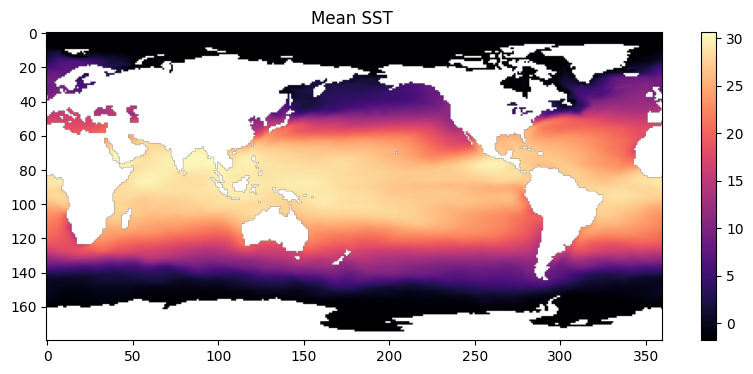

In [30]:
# get the grid in January
itime=1000
sst = sstdata['sst'][itime,:,:]

# now make a plot, using plt.imshow()
plt.figure(figsize=(10,4))
plt.imshow(sst,cmap='magma')
plt.colorbar()
plt.title(f'Mean SST ')

# save the figure as a pdf
plt.savefig('my_figure.pdf')

plt.show()

In [25]:
print(sstdata['time'][1580])

48090.0
